In [1]:

import pandas as pd
from vega import Vega,VegaLite
import altair as alt
alt.renderers.enable('notebook')



RendererRegistry.enable('notebook')

In [2]:
false=False
true=True
null=None

In [7]:
data = pd.read_csv('bivs_SSR_transform_bigartm_20topic.csv')
data.head()

,docID,year,month,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0,1999,10,0.000000,0.000000,0.0,0.0,0.000000,0.488537,0.000000,...,0.000000,0.0,0.000000,0.0,0.066195,0.000000,0.000000,0.199918,0.000000,0.000000
1,1,1999,10,0.304284,0.271577,0.0,0.0,0.000000,0.000000,0.267460,...,0.000000,0.0,0.063658,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1999,10,0.111435,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.244593,0.000000,0.000000,0.000000,0.000000
3,3,1999,10,0.053640,0.000000,0.0,0.0,0.204141,0.000000,0.213693,...,0.019033,0.0,0.032478,0.0,0.000000,0.000000,0.022262,0.000000,0.000000,0.062487
4,4,1999,10,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.071829,0.0,0.203797,0.000000,0.000000,0.000000,0.163072,0.000000


In [8]:
data['date'] = ['{}-{:02d}-01'.format(a, b) for a, b in data[['year', 'month']].values]
cols = [c for c in data.columns if c.startswith('topic')]

In [10]:
dd = data[cols + ['date']].melt('date', var_name='topic', value_name='mentions')

In [11]:
#Для  красивовой полосы выбора временного интервала
ddt = dd[['date', 'mentions']].groupby('date').sum(axis=1)
ddt.reset_index().to_csv('sum_mention.csv',index=False)

In [7]:
dd = dd[dd['mentions'] > 0]


In [24]:
dd2 = dd.groupby(['date','topic']).sum()
dd2.head()

mentions
date       topic             
1999-08-01 topic_1   0.518046
           topic_10  0.148091
           topic_11  0.094613
           topic_12  0.169081
           topic_13  0.506769

In [25]:
dd2=dd2.reset_index()

In [96]:
dd2.head()

,date,topic,mentions
0,1999-08-01,topic_1,0.518046
1,1999-08-01,topic_10,0.148091
2,1999-08-01,topic_11,0.094613
3,1999-08-01,topic_12,0.169081
4,1999-08-01,topic_13,0.506769


In [88]:
import numpy as np

In [98]:
dd3 =dd2[['date','topic']]

In [99]:
dd3['mentions'] = dd2.mentions.apply(lambda x: np.log(x+1))

In [100]:
dd3.head()

,date,topic,mentions
0,1999-08-01,topic_1,0.417424
1,1999-08-01,topic_10,0.138100
2,1999-08-01,topic_11,0.090401
3,1999-08-01,topic_12,0.156218
4,1999-08-01,topic_13,0.409968


In [101]:
dd3.to_csv('dd3_log_for_graf.csv',index=False)

In [87]:
dd2.mentions.describe()

count    4554.000000
mean       13.407115
std        13.238395
min         0.002416
25%         4.852033
50%        10.538544
75%        17.916334
max       263.989830
Name: mentions, dtype: float64

In [15]:
rows

array(['Финансы', 'Страны Балтии', 'СНГ', 'Авиация', 'Россия-Белоруссия',
       'Выборы', 'Правительство РФ', 'Происшествия', 'Военные операции',
       'Россия', 'Украина', 'Украина - ДНР/ЛНР', 'Грузия',
       'Протесты на Украине', 'Силовые структуры'], dtype=object)

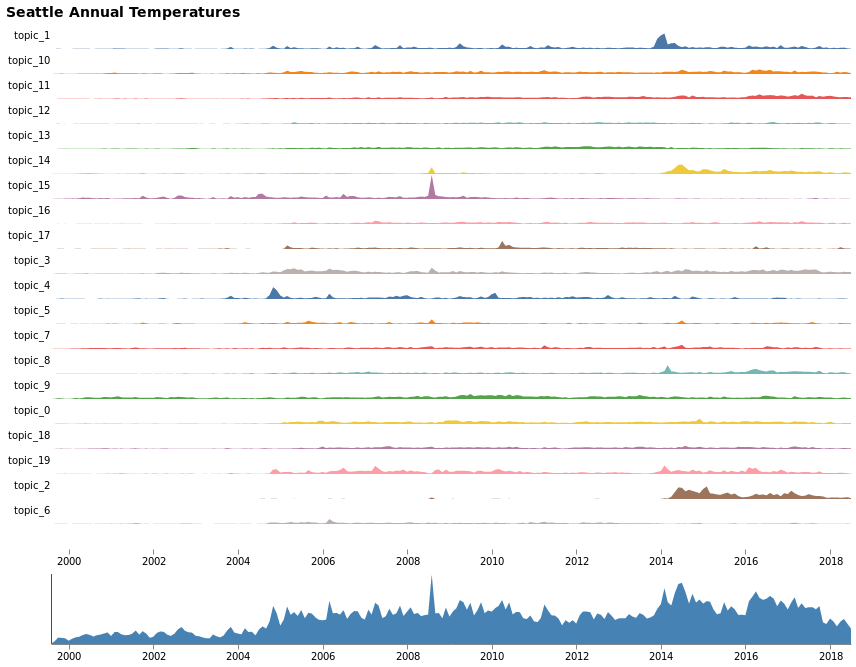

In [16]:
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 800,
    "height":800,
  "padding": 5,

  "config": {
    "title": {"fontSize": 14}
  },

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "start", "offset": 4
  },

  "signals": [
    {"name": "rangeStep", "value": 25},
    {"name": "height", "update": "rangeStep * 21"},
    {"name": "detailDomain" }
  ],

  "data": [
    {
      "name": "base",
      "url": "dd2_for_graf.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    },
      
      {
      "name": "base2",
      "url": "sum_mention.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    }
      
  ],

  "scales": [
    {
      "name": "row",
      "type": "band",
      "domain": [
        'topic_1', 'topic_10', 'topic_11', 'topic_12', 'topic_13',
       'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_3',
       'topic_4', 'topic_5', 'topic_7', 'topic_8', 'topic_9', 'topic_0',
       'topic_18', 'topic_19', 'topic_2', 'topic_6'
      ],
      "range": {"step": {"signal": "rangeStep"}}
    },
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "base", "field": "date"},
      "range": "width",
        "domainRaw": {"signal": "detailDomain"}
    },
    {
      "name": "y",
      "type": "linear", "zero": false,
      "domain": {"data": "base", "field": "mentions"},
      "range": [{"signal": "rangeStep"}, 1]
    },
     
      {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": {"data": "base", "field": "topic"}
    }
      
      
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false,  },
    {
      "orient": "left", "scale": "row", "domain": false, 
      "tickSize": 0,
   
    }
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "many_rows",
          "data": "base",
          "groupby": "topic"
        }
      },
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"scale": "row", "field": "topic"},
          "width": {"signal": "width"},
          "height": {"signal": "rangeStep"},
       
        }
      },
      "marks": [
        {
          "type": "area",
          "from": {"data": "many_rows"},
          "encode": {
            "enter": {
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
              "y2": {"signal": "rangeStep"},
              "fill": {"scale": "color", "field": "topic"}
            },
              "update": {
               
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
          },
            
               
        }}
      ]
    },
      
      
       {
      "type": "group",
      "name": "overview",
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"value": 550},
          "height": {"value": 70},
          "width": {"value": 800},
          "fill": {"value": "transparent"}
        }
      },
      "signals": [
        {
          "name": "brush", "value": 0,
          "on": [
            {
              "events": "@overview:mousedown",
              "update": "[x(), x()]"
            },
            {
              "events": "[@overview:mousedown, window:mouseup] > window:mousemove!",
              "update": "[brush[0], clamp(x(), 0, width)]"
            },
            {
              "events": {"signal": "delta"},
              "update": "clampRange([anchor[0] + delta, anchor[1] + delta], 0, width)"
            }
          ]
        },
        {
          "name": "anchor", "value": null,
          "on": [{"events": "@brush:mousedown", "update": "slice(brush)"}]
        },
        {
          "name": "xdown", "value": 0,
          "on": [{"events": "@brush:mousedown", "update": "x()"}]
        },
        {
          "name": "delta", "value": 0,
          "on": [
            {
              "events": "[@brush:mousedown, window:mouseup] > window:mousemove!",
              "update": "x() - xdown"
            }
          ]
        },
        {
          "name": "detailDomain",
          "push": "outer",
          "on": [
            {
              "events": {"signal": "brush"},
              "update": "span(brush) ? invert('xOverview', brush) : null"
            }
          ]
        }
      ],
      "scales": [
        {
          "name": "xOverview",
          "type": "time",
          "range": "width",
          "domain": {"data": "base2", "field": "date"}
        },
        {
          "name": "yOverview",
          "type": "linear",
          "range": [70, 0],
          "domain": {"data": "base2", "field": "mentions"},
          "nice": true, "zero": true
        }
      ],
      "axes": [
        {"orient": "bottom", "scale": "xOverview"}
      ],
      "marks": [
        {
          "type": "area",
          "interactive": false,
          "from": {"data": "base2"},
          "encode": {
            "update": {
              "x": {"scale": "xOverview", "field": "date"},
              "y": {"scale": "yOverview", "field": "mentions"},
              "y2": {"scale": "yOverview", "value": 0},
              "fill": {"value": "steelblue"}
            }
          }
        },
        {
          "type": "rect",
          "name": "brush",
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "fill": {"value": "#333"},
              "fillOpacity": {"value": 0.2}
            },
            "update": {
              "x": {"signal": "brush[0]"},
              "x2": {"signal": "brush[1]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[0]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[1]"}
            }
          }
        }
      ]
    }
      
      
  ]
}
  )

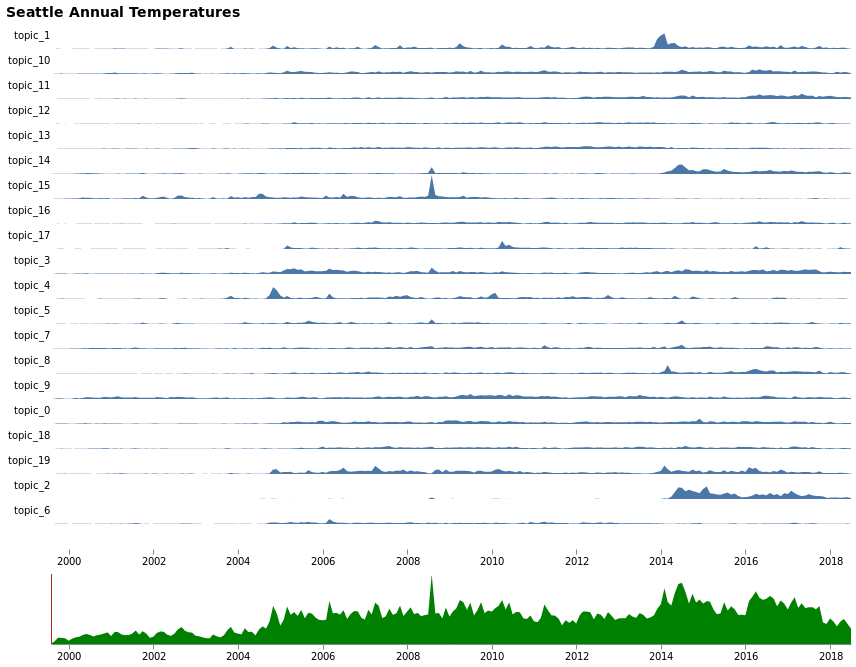

In [18]:
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 800,
    "height":800,
  "padding": 5,

  "config": {
    "title": {"fontSize": 14}
  },

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "start", "offset": 4
  },

  "signals": [
    {"name": "rangeStep", "value": 25},
    {"name": "height", "update": "rangeStep * 21"},
    {"name": "detailDomain" }
  ],

  "data": [
    {
      "name": "base",
      "url": "dd2_for_graf.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    },
       {
      "name": "base2",
      "url": "sum_mention.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    }
  ],

  "scales": [
    {
      "name": "row",
      "type": "band",
      "domain": [
        'topic_1', 'topic_10', 'topic_11', 'topic_12', 'topic_13',
       'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_3',
       'topic_4', 'topic_5', 'topic_7', 'topic_8', 'topic_9', 'topic_0',
       'topic_18', 'topic_19', 'topic_2', 'topic_6'
      ],
      "range": {"step": {"signal": "rangeStep"}}
    },
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "base", "field": "date"},
      "range": "width",
        "domainRaw": {"signal": "detailDomain"}
    },
    {
      "name": "y",
      "type": "linear", "zero": false,
      "domain": {"data": "base", "field": "mentions"},
      "range": [{"signal": "rangeStep"}, 1]
    },
     
    
      
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false,  },
    {
      "orient": "left", "scale": "row", "domain": false, 
      "tickSize": 0,
   
    }
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "many_rows",
          "data": "base",
          "groupby": "topic"
        }
      },
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"scale": "row", "field": "topic"},
          "width": {"signal": "width"},
          "height": {"signal": "rangeStep"},
       
        }
      },
      "marks": [
        {
          "type": "area",
          "from": {"data": "many_rows"},
          "encode": {
            "enter": {
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
              "y2": {"signal": "rangeStep"},
             
            },
              "update": {
               
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
          },
            
               
        }}
      ]
    },
      
      
       {
      "type": "group",
      "name": "overview",
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"value": 550},
          "height": {"value": 70},
          "width": {"value": 800},
          "fill": {"value": "transparent"}
        }
      },
      "signals": [
        {
          "name": "brush", "value": 0,
          "on": [
            {
              "events": "@overview:mousedown",
              "update": "[x(), x()]"
            },
            {
              "events": "[@overview:mousedown, window:mouseup] > window:mousemove!",
              "update": "[brush[0], clamp(x(), 0, width)]"
            },
            {
              "events": {"signal": "delta"},
              "update": "clampRange([anchor[0] + delta, anchor[1] + delta], 0, width)"
            }
          ]
        },
        {
          "name": "anchor", "value": null,
          "on": [{"events": "@brush:mousedown", "update": "slice(brush)"}]
        },
        {
          "name": "xdown", "value": 0,
          "on": [{"events": "@brush:mousedown", "update": "x()"}]
        },
        {
          "name": "delta", "value": 0,
          "on": [
            {
              "events": "[@brush:mousedown, window:mouseup] > window:mousemove!",
              "update": "x() - xdown"
            }
          ]
        },
        {
          "name": "detailDomain",
          "push": "outer",
          "on": [
            {
              "events": {"signal": "brush"},
              "update": "span(brush) ? invert('xOverview', brush) : null"
            }
          ]
        }
      ],
      "scales": [
        {
          "name": "xOverview",
          "type": "time",
          "range": "width",
          "domain": {"data": "base2", "field": "date"}
        },
        {
          "name": "yOverview",
          "type": "linear",
          "range": [70, 0],
          "domain": {"data": "base2", "field": "mentions"},
          "nice": true, "zero": true
        }
      ],
      "axes": [
        {"orient": "bottom", "scale": "xOverview"}
      ],
      "marks": [
        {
          "type": "area",
          "interactive": false,
          "from": {"data": "base2"},
          "encode": {
            "update": {
              "x": {"scale": "xOverview", "field": "date"},
              "y": {"scale": "yOverview", "field": "mentions"},
              "y2": {"scale": "yOverview", "value": 0},
              "fill": {"value": "green"}
            }
          }
        },
        {
          "type": "rect",
          "name": "brush",
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "fill": {"value": "#333"},
              "fillOpacity": {"value": 0.2}
            },
            "update": {
              "x": {"signal": "brush[0]"},
              "x2": {"signal": "brush[1]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[0]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[1]"}
            }
          }
        }
      ]
    }
      
      
  ]
}
  )

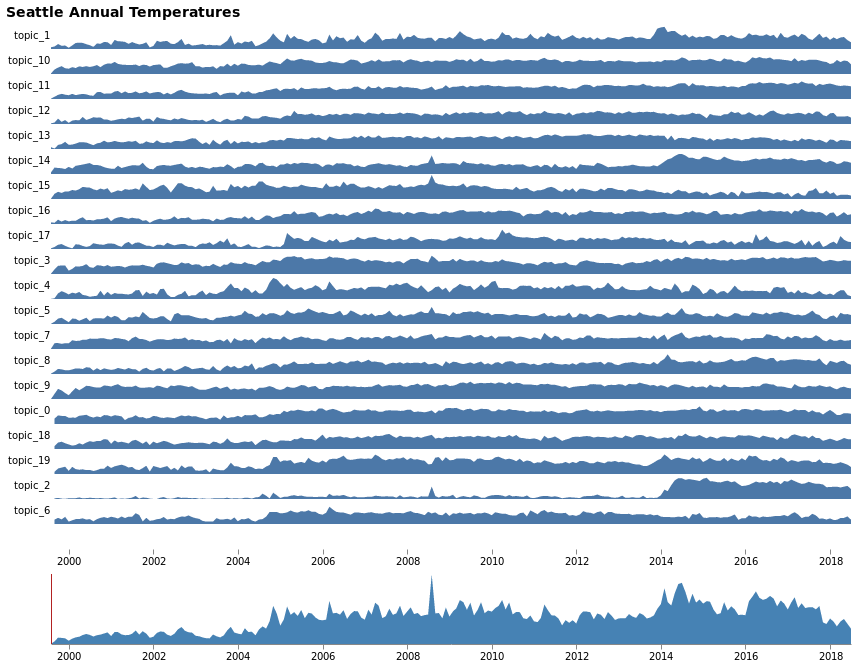

In [20]:
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v4.json",
  "width": 800,
    "height":800,
  "padding": 5,

  "config": {
    "title": {"fontSize": 14}
  },

  "title": {
    "text": "Seattle Annual Temperatures",
    "anchor": "start", "offset": 4
  },

  "signals": [
    {"name": "rangeStep", "value": 25},
    {"name": "height", "update": "rangeStep * 21"},
    {"name": "detailDomain" }
  ],

  "data": [
    {
      "name": "base",
      "url": "dd3_log_for_graf.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    },
       {
      "name": "base2",
      "url": "sum_mention.csv",
      "format": {"type": "csv", "parse": {"mentions": "number", "date": "date"}},
    
    }
  ],

  "scales": [
    {
      "name": "row",
      "type": "band",
      "domain": [
        'topic_1', 'topic_10', 'topic_11', 'topic_12', 'topic_13',
       'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_3',
       'topic_4', 'topic_5', 'topic_7', 'topic_8', 'topic_9', 'topic_0',
       'topic_18', 'topic_19', 'topic_2', 'topic_6'
      ],
      "range": {"step": {"signal": "rangeStep"}}
    },
    {
      "name": "x",
      "type": "time",
      "domain": {"data": "base", "field": "date"},
      "range": "width",
        "domainRaw": {"signal": "detailDomain"}
    },
    {
      "name": "y",
      "type": "linear", "zero": false,
      "domain": {"data": "base", "field": "mentions"},
      "range": [{"signal": "rangeStep"}, 1]
    },
     
    
      
  ],

  "axes": [
    {"orient": "bottom", "scale": "x", "domain": false,  },
    {
      "orient": "left", "scale": "row", "domain": false, 
      "tickSize": 0,
   
    }
  ],

  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "many_rows",
          "data": "base",
          "groupby": "topic"
        }
      },
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"scale": "row", "field": "topic"},
          "width": {"signal": "width"},
          "height": {"signal": "rangeStep"},
       
        }
      },
      "marks": [
        {
          "type": "area",
          "from": {"data": "many_rows"},
          "encode": {
            "enter": {
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
              "y2": {"signal": "rangeStep"},
             
            },
              "update": {
               
              "x": {"scale": "x", "field": "date"},
              "y": {"scale": "y", "field": "mentions"},
          },
            
               
        }}
      ]
    },
      
      
       {
      "type": "group",
      "name": "overview",
      "encode": {
        "enter": {
          "x": {"value": 0},
          "y": {"value": 550},
          "height": {"value": 70},
          "width": {"value": 800},
          "fill": {"value": "transparent"}
        }
      },
      "signals": [
        {
          "name": "brush", "value": 0,
          "on": [
            {
              "events": "@overview:mousedown",
              "update": "[x(), x()]"
            },
            {
              "events": "[@overview:mousedown, window:mouseup] > window:mousemove!",
              "update": "[brush[0], clamp(x(), 0, width)]"
            },
            {
              "events": {"signal": "delta"},
              "update": "clampRange([anchor[0] + delta, anchor[1] + delta], 0, width)"
            }
          ]
        },
        {
          "name": "anchor", "value": null,
          "on": [{"events": "@brush:mousedown", "update": "slice(brush)"}]
        },
        {
          "name": "xdown", "value": 0,
          "on": [{"events": "@brush:mousedown", "update": "x()"}]
        },
        {
          "name": "delta", "value": 0,
          "on": [
            {
              "events": "[@brush:mousedown, window:mouseup] > window:mousemove!",
              "update": "x() - xdown"
            }
          ]
        },
        {
          "name": "detailDomain",
          "push": "outer",
          "on": [
            {
              "events": {"signal": "brush"},
              "update": "span(brush) ? invert('xOverview', brush) : null"
            }
          ]
        }
      ],
      "scales": [
        {
          "name": "xOverview",
          "type": "time",
          "range": "width",
          "domain": {"data": "base2", "field": "date"}
        },
        {
          "name": "yOverview",
          "type": "linear",
          "range": [70, 0],
          "domain": {"data": "base2", "field": "mentions"},
          "nice": true, "zero": true
        }
      ],
      "axes": [
        {"orient": "bottom", "scale": "xOverview"}
      ],
      "marks": [
        {
          "type": "area",
          "interactive": false,
          "from": {"data": "base2"},
          "encode": {
            "update": {
              "x": {"scale": "xOverview", "field": "date"},
              "y": {"scale": "yOverview", "field": "mentions"},
              "y2": {"scale": "yOverview", "value": 0},
              "fill": {"value": "steelblue"}
            }
          }
        },
        {
          "type": "rect",
          "name": "brush",
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "fill": {"value": "#333"},
              "fillOpacity": {"value": 0.2}
            },
            "update": {
              "x": {"signal": "brush[0]"},
              "x2": {"signal": "brush[1]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[0]"}
            }
          }
        },
        {
          "type": "rect",
          "interactive": false,
          "encode": {
            "enter": {
              "y": {"value": 0},
              "height": {"value": 70},
              "width": {"value": 1},
              "fill": {"value": "firebrick"}
            },
            "update": {
              "x": {"signal": "brush[1]"}
            }
          }
        }
      ]
    }
      
      
  ]
}
  )